# Classification model to detect Lung Cancer with-CNN
(PNEUMONIA)

Name:Kiran Landge

Dataset_link=https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
#importing required model
import pandas as pd
import cv2 as cv
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [2]:
TRAIN_DATASET=r"C:\Users\Tejal\Downloads\archive (5)\chest_xray\train"
TEST_DATASET=r"C:\Users\Tejal\Downloads\archive (5)\chest_xray\test"
CATEGORIES=['NORMAL','PNEUMONIA']

In [3]:
DATASET=r"C:\Users\Tejal\Downloads\archive (5)\chest_xray\train"
no_img={}
for dir in os.listdir(DATASET):
    no_img[dir]=len(os.listdir(os.path.join(DATASET,dir))) 

In [4]:
no_img.items()

dict_items([('NORMAL', 1341), ('PNEUMONIA', 3875)])

In [5]:
len(TRAIN_DATASET)

53

(1858, 2090, 3)


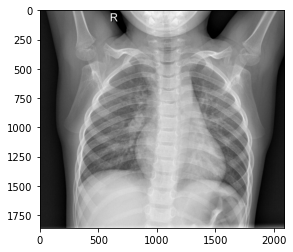

(1858, 2090, 3)


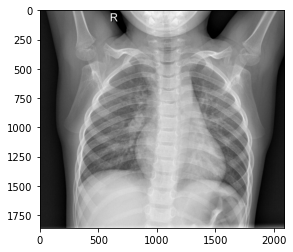

(1858, 2090, 3)


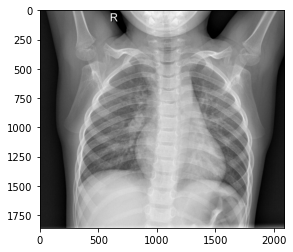

(1858, 2090, 3)


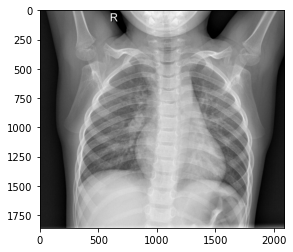

(760, 1152, 3)


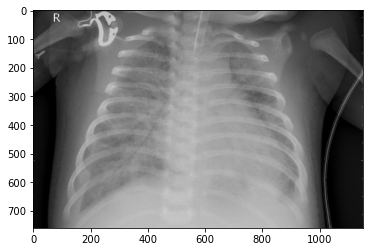

(760, 1152, 3)


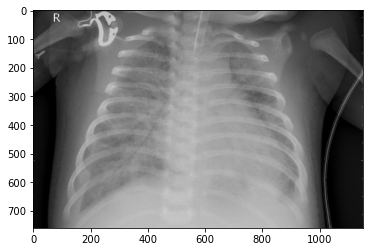

(760, 1152, 3)


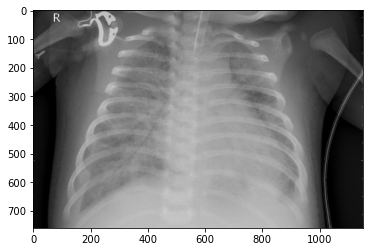

(760, 1152, 3)


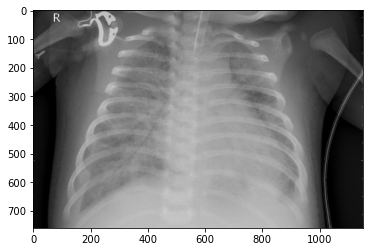

In [6]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(TRAIN_DATASET,category)            
        for i in range(1,5): 
            for img_file in os.listdir(path):

                img=cv.imread(os.path.join(path,img_file),1)
                img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
                print(img.shape)
                plt.imshow(img)
                plt.show()
                break
            
        #plotting single image from each folder

(1858, 2090, 3)


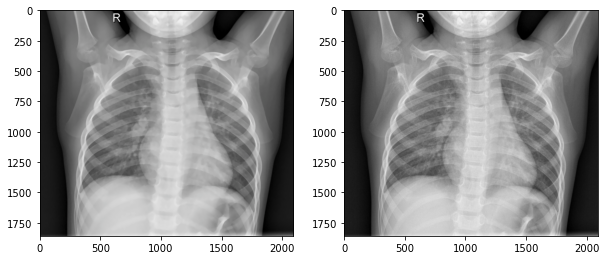

(760, 1152, 3)


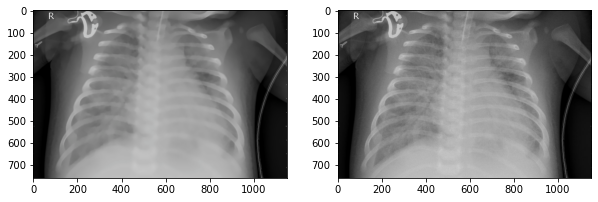

In [7]:
#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(TRAIN_DATASET,category)
        
        for img_file in os.listdir(path):
  
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
     
        #plotting single image from each folder

In [8]:
#make train data
train_data=[]

for category in CATEGORIES:
    
      
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])

In [9]:
#Target Class Representation 
for category in CATEGORIES:
        print(f"{category}:")
        label=CATEGORIES.index(category)
        print(label)
        path=os.path.join(TRAIN_DATASET,category)
        print(path)


NORMAL:
0
C:\Users\Tejal\Downloads\archive (5)\chest_xray\train\NORMAL
PNEUMONIA:
1
C:\Users\Tejal\Downloads\archive (5)\chest_xray\train\PNEUMONIA


In [10]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        
        label=CATEGORIES.index(category)
        path=os.path.join(TRAIN_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])

In [11]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])

In [12]:
print(len(train_data))
print(len(test_data))

5216
624


In [13]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [14]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])
    print(lbl)

1
[array([[[ 0,  0,  0],
        [ 4,  4,  4],
        [ 9,  9,  9],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 8,  8,  8],
        [ 7,  7,  7],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 2,  2,  2],
        [ 4,  4,  4],
        ...,
        [10, 10, 10],
        [ 5,  5,  5],
        [ 3,  3,  3]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 7,  7,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [10, 10, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [11, 11, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8), 1]
0
[array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
   

In [15]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(5216, 5216)

In [16]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(624, 624)

In [17]:
train_y.count(0)

1341

In [18]:
train_y.count(1)

3875

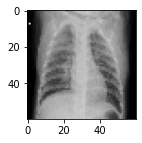

In [19]:
#Checking the image in train_X and train_y
plt.figure(figsize=(4,2))
plt.imshow(train_X[0])

In [20]:
train_y[0]

1

In [21]:
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

(5216, 60, 60, 3)

In [22]:
test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

(624, 60, 60, 3)

C:\Users\Tejal\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

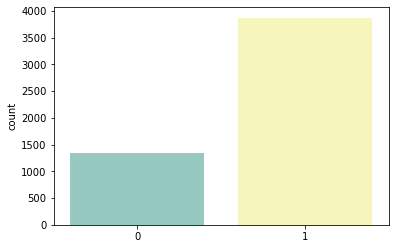

In [23]:
#count labels

sns.countplot(train_y,palette='Set3')

In [24]:
#convert label into the one hot encode
from keras.utils import to_categorical

#train y
one_hot_train= tf.one_hot(train_y,2)
print(one_hot_train)

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(5216, 2), dtype=float32)


In [25]:
#test_y
one_hot_test= tf.one_hot(test_y,2)
one_hot_test

<tf.Tensor: shape=(624, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

# MODEL BUILDING

In [26]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
          
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       7

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(train_X,one_hot_train,epochs=80,batch_size=128,validation_split=0.2)

Epoch 1/80
33/33 [==============================] - 18s 554ms/step - loss: 0.5664 - accuracy: 0.7332 - val_loss: 0.5758 - val_accuracy: 0.7404
Epoch 2/80
33/33 [==============================] - 16s 497ms/step - loss: 0.4188 - accuracy: 0.7644 - val_loss: 0.4779 - val_accuracy: 0.7069
Epoch 3/80
33/33 [==============================] - 17s 519ms/step - loss: 0.3295 - accuracy: 0.8562 - val_loss: 0.4109 - val_accuracy: 0.7921
Epoch 4/80
33/33 [==============================] - 17s 511ms/step - loss: 0.2404 - accuracy: 0.9029 - val_loss: 0.3550 - val_accuracy: 0.8602
Epoch 5/80
33/33 [==============================] - 17s 512ms/step - loss: 0.2092 - accuracy: 0.9163 - val_loss: 0.3847 - val_accuracy: 0.8257
Epoch 6/80
33/33 [==============================] - 16s 497ms/step - loss: 0.1927 - accuracy: 0.9257 - val_loss: 0.3032 - val_accuracy: 0.8726
Epoch 7/80
33/33 [==============================] - 16s 471ms/step - loss: 0.1915 - accuracy: 0.9243 - val_loss: 0.1486 - val_accuracy: 0.9531

Epoch 58/80
33/33 [==============================] - 15s 444ms/step - loss: 0.0192 - accuracy: 0.9911 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 59/80
33/33 [==============================] - 15s 447ms/step - loss: 0.0146 - accuracy: 0.9940 - val_loss: 0.0525 - val_accuracy: 0.9837
Epoch 60/80
33/33 [==============================] - 15s 443ms/step - loss: 0.0166 - accuracy: 0.9935 - val_loss: 0.0599 - val_accuracy: 0.9799
Epoch 61/80
33/33 [==============================] - 15s 455ms/step - loss: 0.0196 - accuracy: 0.9926 - val_loss: 0.0598 - val_accuracy: 0.9828
Epoch 62/80
33/33 [==============================] - 15s 446ms/step - loss: 0.0203 - accuracy: 0.9907 - val_loss: 0.0552 - val_accuracy: 0.9789
Epoch 63/80
33/33 [==============================] - 15s 451ms/step - loss: 0.0230 - accuracy: 0.9914 - val_loss: 0.0719 - val_accuracy: 0.9751
Epoch 64/80
33/33 [==============================] - 15s 447ms/step - loss: 0.0135 - accuracy: 0.9947 - val_loss: 0.0715 - val_accuracy:

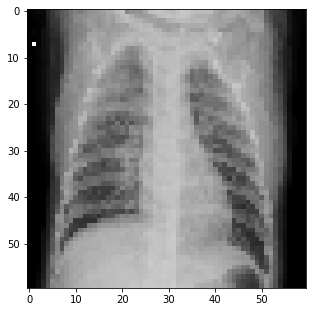

In [29]:
plt.figure(figsize=(5,10))
plt.imshow(train_X[0])

In [30]:
from keras.models import load_model 
model.save("Cancerdisease.h5") 

In [31]:
y_pred=model.predict_classes(test_X)
y_pred[:10]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [32]:
#Representing actual vs predicted o/p:
for i in range(10):
    print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))

Actual=0, Predicted=1
Actual=1, Predicted=1
Actual=1, Predicted=1
Actual=0, Predicted=0
Actual=1, Predicted=1
Actual=0, Predicted=1
Actual=1, Predicted=1
Actual=0, Predicted=0
Actual=1, Predicted=1
Actual=1, Predicted=1


In [33]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)

0.7708333333333334

<AxesSubplot:>

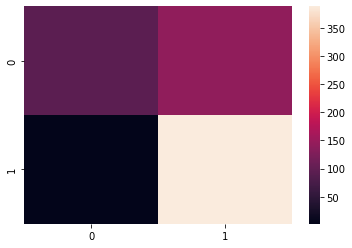

In [34]:
sns.heatmap(confusion_matrix(test_y,y_pred))

In [35]:
from keras.preprocessing.image import load_img,img_to_array

# Checking the model by applying it on different test images randomly

In [36]:
from PIL import Image
import cv2
path1=r"C:\Users\Tejal\Downloads\archive (5)\chest_xray\chest_xray\train\PNEUMONIA\person3_bacteria_12.jpeg"
#This is the image of Infected person with disease i.e PNEUMONIA 

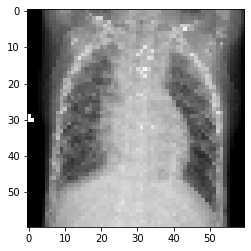

The person is having PNEUMONIA


In [37]:
img=cv.imread(path1,1)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img=cv.resize(img,(60,60))
img=tf.keras.preprocessing.image.img_to_array(img)/255
predict_data =img.reshape(1,60,60,3)
plt.imshow(img)
plt.show()
#print(img.shape)

pred=model.predict_classes(predict_data)
#print(pred)

if pred==0:
    print("The person is not having PNEUMONIA")
else:
    print("The person is having PNEUMONIA")

In [46]:
path2=r"C:\Users\Tejal\Downloads\archive (5)\chest_xray\chest_xray\train\NORMAL\IM-0160-0001.jpeg"
#This is image of normal person which is not effected by PNEUMONIA


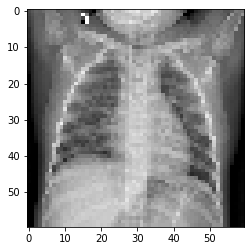

The person is not having PNEUMONIA


In [47]:
import cv2 as cv
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
img=cv.imread(path2,1)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img=cv.resize(img,(60,60))
img=tf.keras.preprocessing.image.img_to_array(img)/255
predict_data =img.reshape(1,60,60,3)
plt.imshow(img)
plt.show()
#print(img.shape)
pred=model.predict_classes(predict_data)
#print(pred)

if pred==0:
    print("The person is not having PNEUMONIA")
else:
    print("The person is having PNEUMONIA")